In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

<ipython-input-1-d4c4a924b560>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 

In [ ]:
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
from contextlib import contextmanager
import warnings

warnings.filterwarnings('ignore')

import re #This module provides regular expression matching operations sivitor
from scipy.sparse import csr_matrix

#leporting all the required Libraries

In [ ]:
print(books.shape)
print(list (books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [ ]:
books.head()

ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                           imageUrlM  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                           imageUrlL  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

ISBN  \
209538  078946697X   
221678  0789466953   

                                                                                                          bookTitle  \
209538  DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"          
221678  DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"   

       bookAuthor  yearOfPublication  \
209538  2000       DK Publishing Inc   
221678  2000       DK Publishing Inc   

                                                           publisher  \
209538  http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg   
221678  http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg   

                                                           imageUrlS  \
209538  http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg   
221678  http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg   

                                                           imageUrlM imageUrlL  
209538  http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg  NaN       
221678  http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg  NaN

In [ ]:
books.loc[books.ISBN =='0789466953', 'yearOfPublication'] = 2000
books.loc[books.ISBN =='078946697X', 'bookAuthor'] ="James Buckley"
books.loc[books.ISBN=='0789466953', 'publisher' ] ="DK Publishing Inc"
books.loc[books. ISBN== '078946697X', 'bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
#corrections in the book record for ISBN 0789466953

In [ ]:
books.loc[books.ISBN =='078946697X', 'yearOfPublication'] = 2000

books.loc[books.ISBN =='078946697X', 'bookAuthor'] ="Michael Teitelbaum"
books.loc[books.ISBN=='078946697X', 'publisher' ] ="DK Publishing Inc"

books.loc[books. ISBN== '078946697X', 'bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#corrections in the book record for ISBN 0789466953

In [ ]:
books.loc[books.yearOfPublication == 'Gallimard', :]

ISBN  \
220731  2070426769   

                                                                       bookTitle  \
220731  Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"   

       bookAuthor yearOfPublication  \
220731  2003       Gallimard          

                                                           publisher  \
220731  http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg   

                                                           imageUrlS  \
220731  http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg   

                                                           imageUrlM imageUrlL  
220731  http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg  NaN

In [ ]:
books.loc[books.ISBN =='2070426769', 'yearOfPublication'] = 2003

books.loc[books.ISBN =='2070426769', 'bookAuthor'] ="Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN=='2070426769', 'publisher' ] ="Gallimard"

books.loc[books. ISBN== '2070426769', 'bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

#corrections in the book record for ISBN 0789466953

In [ ]:
books.yearOfPublication =pd.to_numeric(books.yearOfPublication, errors = 'coerce')

#invalid parsing will be set as NaN#

In [ ]:
print (sorted(books['yearOfPublication']. unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
books.loc[(books.yearOfPublication >2006)| (books.yearOfPublication ==0), 'yearofPublication'] = np.NAN

books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace= True )

In [ ]:
books.yearOfPublication= books.yearOfPublication.astype(np.int32)


In [ ]:
books.loc[books.publisher.isnull(),:]

ISBN        bookTitle       bookAuthor  yearOfPublication  \
128890  193169656X  Tyrant Moon      Elaine Corvidae  2002                
129037  1931696993  Finders Keepers  Linnea Sinclair  2001                

       publisher  \
128890  NaN        
129037  NaN        

                                                           imageUrlS  \
128890  http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg   
129037  http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg   

                                                           imageUrlM  \
128890  http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg   
129037  http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg   

                                                           imageUrlL  \
128890  http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg   
129037  http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg   

        yearofPublication  
128890 NaN                 
129037 NaN

In [ ]:
books.loc[(books. ISBN == '193169656x'), 'publisher'] = 'other'
books.loc[(books. ISBN =='1931696993'), 'publisher'] = 'other'
#the nutt publishers are replaced with 'others' in the book records

In [ ]:
print (users.shape)

print(list (users.columns))

(278858, 3)
['userID', 'Location', 'Age']


In [ ]:
users.head()

userID                            Location   Age
0  1       nyc, new york, usa                 NaN  
1  2       stockton, california, usa           18.0
2  3       moscow, yukon territory, russia    NaN  
3  4       porto, v.n.gaia, portugal           17.0
4  5       farnborough, hants, united kingdom NaN

In [ ]:
users.dtypes

userID      int64  
Location    object 
Age         float64
dtype: object

In [ ]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [ ]:
print(sorted (users. Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [ ]:
users.loc[(users.Age >90) |(users. Age< 5), 'Age'] = np.nan

users. Age= users.Age.fillna (users. Age.mean())

users. Age= users.Age.astype (np.int32)

In [ ]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
print (ratings.shape)

print(list (ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [ ]:
ratings.head()

userID        ISBN  bookRating
0  276725  034545104X  0         
1  276726  0155061224  5         
2  276727  0446520802  0         
3  276729  052165615X  3         
4  276729  0521795028  6

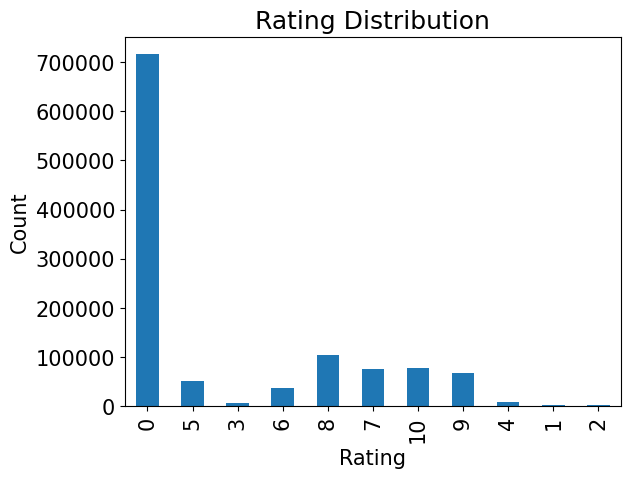

In [ ]:
plt.rc("font", size = 15)

ratings.bookRating.value_counts (sort= False).plot(kind ='bar')

plt.title('Rating Distribution')

plt.xlabel('Rating')

plt.ylabel('Count')

plt.plot()

plt.savefig("Ratings Distribution.jpg", bbox_inches="tight", dpi = 100)



In [ ]:
n_users = users.shape[0]

n_books = books.shape[0]

# no. of rows will be saved into n books of books dataset

print(n_users* n_books)

75670906880


In [ ]:
new_ratings= ratings[ratings. ISBN.isin(books. ISBN)]
new_ratings =new_ratings[new_ratings.userID.isin(users.userID)]

In [ ]:
print(ratings.shape)
print (new_ratings.shape)

(1149780, 3)
(1031136, 3)


In [ ]:
new_ratings.head()

userID        ISBN  bookRating
0  276725  034545104X  0         
1  276726  0155061224  5         
2  276727  0446520802  0         
3  276729  052165615X  3         
4  276729  0521795028  6

In [ ]:
sparsity = 1.0 -len(new_ratings)/float (n_users *n_books)
print( 'The sparsity level of Book Crossing Dataset is' + str(sparsity* 100)+'%')

The sparsity level of Book Crossing Dataset is99.99863734155898%


In [ ]:
ratings.bookRating.unique()



array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
ratings_explicit = new_ratings [new_ratings.bookRating != 0]
ratings_implicit= new_ratings [new_ratings.bookRating == 0]

In [ ]:
users_exp_ratings = users [users.userID. isin(ratings_explicit.userID)]
users_imp_ratings= users[users.userID. isin(ratings_implicit.userID)]

In [ ]:
print(new_ratings.shape)
print(ratings_explicit.shape)
print (ratings_implicit.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


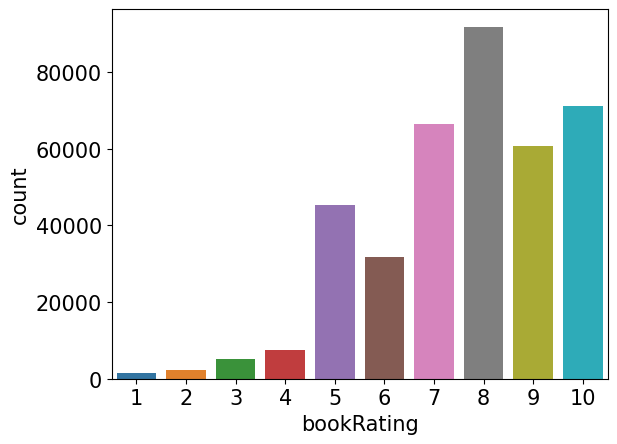

In [ ]:
sns.countplot(data =ratings_explicit, x = 'bookRating')

plt.show()

Popularity Bases Recommendation System

In [ ]:
 ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
 top10 =ratings_count.sort_values('bookRating', ascending =False).head(10)
 print("Following books are recommended")
 top10.merge(books, left_index = True, right_on = 'ISBN')

Following books are recommended


bookRating        ISBN  \
408   5787        0316666343   
748   4108        0385504209   
522   3134        0312195516   
2143  2798        059035342X   
356   2595        0142001740   
26    2551        0971880107   
1105  2524        0060928336   
706   2402        0446672211   
231   2219        0452282152   
118   2179        0671027360   

                                                             bookTitle  \
408   The Lovely Bones: A Novel                                          
748   The Da Vinci Code                                                  
522   The Red Tent (Bestselling Backlist)                                
2143  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
356   The Secret Life of Bees                                            
26    Wild Animus                                                        
1105  Divine Secrets of the Ya-Ya Sisterhood: A Novel                    
706   Where the Heart Is (Oprah's Book Club (Paperback))                 
231   Girl with a Pearl Earring                                          
118   Angels &amp; Demons                                                

           bookAuthor  yearOfPublication               publisher  \
408   Alice Sebold     2002               Little, Brown            
748   Dan Brown        2003               Doubleday                
522   Anita Diamant    1998               Picador USA              
2143  J. K. Rowling    1999               Arthur A. Levine Books   
356   Sue Monk Kidd    2003               Penguin Books            
26    Rich Shapero     2004               Too Far                  
1105  Rebecca Wells    1997               Perennial                
706   Billie Letts     1998               Warner Books             
231   Tracy Chevalier  2001               Plume Books              
118   Dan Brown        2001               Pocket Star              

                                                         imageUrlS  \
408   http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg   
748   http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg   
522   http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg   
2143  http://images.amazon.com/images/P/059035342X.01.THUMBZZZ.jpg   
356   http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg   
1105  http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg   
706   http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg   
231   http://images.amazon.com/images/P/0452282152.01.THUMBZZZ.jpg   
118   http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg   

                                                         imageUrlM  \
408   http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg   
748   http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg   
522   http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg   
2143  http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg   
356   http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg   
1105  http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg   
706   http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg   
231   http://images.amazon.com/images/P/0452282152.01.MZZZZZZZ.jpg   
118   http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg   

                                                         imageUrlL  \
408   http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg   
748   http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg   
522   http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg   
2143  http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg   
356   http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg   
1105  http://images.amazon.com/images/P/0060928336.01.LZZ

Collaborative Filtering based Recommendation System

In [ ]:
counts1= ratings_explicit['userID'].value_counts()


ratings_explicit =ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]


counts= ratings_explicit['bookRating'].value_counts()


ratings_explicit =ratings_explicit[ratings_explicit['bookRating' ].isin(counts[counts >= 100].index)]



In [ ]:
ratings_matrix= ratings_explicit.pivot (index='userID', columns='ISBN', values='bookRating')
userID= ratings_matrix.index
ISBN= ratings_matrix.columns

print (ratings_matrix.shape)

ratings_matrix.head()


(449, 66574)


ISBN    0000913154  0001046438  000104687X  0001047213  0001047973  \
userID                                                               
2033   NaN         NaN         NaN         NaN         NaN           
2110   NaN         NaN         NaN         NaN         NaN           
2276   NaN         NaN         NaN         NaN         NaN           
4017   NaN         NaN         NaN         NaN         NaN           
4385   NaN         NaN         NaN         NaN         NaN           

ISBN    000104799X  0001048082  0001053736  0001053744  0001055607  ...  \
userID                                                              ...   
2033   NaN         NaN         NaN         NaN         NaN          ...   
2110   NaN         NaN         NaN         NaN         NaN          ...   
2276   NaN         NaN         NaN         NaN         NaN          ...   
4017   NaN         NaN         NaN         NaN         NaN          ...   
4385   NaN         NaN         NaN         NaN         NaN          ...   

ISBN    B000092Q0A  B00009EF82  B00009NDAN  B0000DYXID  B0000T6KHI  \
userID                                                               
2033   NaN         NaN         NaN         NaN         NaN           
2110   NaN         NaN         NaN         NaN         NaN           
2276   NaN         NaN         NaN         NaN         NaN           
4017   NaN         NaN         NaN         NaN         NaN           
4385   NaN         NaN         NaN         NaN         NaN           

ISBN    B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
userID                                                              
2033   NaN         NaN         NaN         NaN         NaN          
2110   NaN         NaN         NaN         NaN         NaN          
2276   NaN         NaN         NaN         NaN         NaN          
4017   NaN         NaN         NaN         NaN         NaN          
4385   NaN         NaN         NaN         NaN         NaN          

[5 rows x 66574 columns]

In [ ]:
n_users = ratings_matrix.shape[0]
n_books= ratings_matrix.shape[1]
print (n_users, n_books)

449 66574


In [ ]:
ratings_matrix.fillna (0, inplace=True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [ ]:
ratings_matrix.head (5)


ISBN    0000913154  0001046438  000104687X  0001047213  0001047973  \
userID                                                               
2033    0           0           0           0           0            
2110    0           0           0           0           0            
2276    0           0           0           0           0            
4017    0           0           0           0           0            
4385    0           0           0           0           0            

ISBN    000104799X  0001048082  0001053736  0001053744  0001055607  ...  \
userID                                                              ...   
2033    0           0           0           0           0           ...   
2110    0           0           0           0           0           ...   
2276    0           0           0           0           0           ...   
4017    0           0           0           0           0           ...   
4385    0           0           0           0           0           ...   

ISBN    B000092Q0A  B00009EF82  B00009NDAN  B0000DYXID  B0000T6KHI  \
userID                                                               
2033    0           0           0           0           0            
2110    0           0           0           0           0            
2276    0           0           0           0           0            
4017    0           0           0           0           0            
4385    0           0           0           0           0            

ISBN    B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
userID                                                              
2033    0           0           0           0           0           
2110    0           0           0           0           0           
2276    0           0           0           0           0           
4017    0           0           0           0           0           
4385    0           0           0           0           0           

[5 rows x 66574 columns]

In [ ]:
sparsity = 1.0-len(ratings_explicit)/float (users_exp_ratings.shape[0]*n_books)

In [ ]:
print ('The sparsity level of Book Crossing dataset is '+ str(sparsity*100) + '%')

The sparsity level of Book Crossing dataset is 99.99772184106935%


In [ ]:
global metric,k
k=10
metric='cosine'

User Based Recommendation system

In [ ]:
def findksimilarusers (user_id, ratings, metric = metric,k=k):
  similarities = []
  indicies = []
  model_knn = NearestNeighbors (metric = metric, algorithm = 'brute')
  model_knn.fit(ratings)
  loc =ratings.index.get_loc (user_id)
  distances, indices = model_knn.kneighbors (ratings.iloc[loc, :].values.reshape(1,-1), n_neighbors = k+1)
  similarities = 1-distances.flatten()
  return similarities, indices


In [ ]:
def predict_userbased (user_id, item_id, ratings, metric =metric, k=k):
  prediction=0
  user_loc= ratings.index.get_loc (user_id)
  item_loc= ratings.columns.get_loc (item_id)
  similarities, indices=findksimilarusers (user_id, ratings, metric, k)
  mean_rating = ratings.iloc[user_loc,:].mean()
  sum_wt = np.sum(similarities)-1
  product=1
  wtd_sum = 8
  for i in range(0, len(indices. flatten())):
    if indices. flatten()[i] == user_loc:
      continue;
    else:
      ratings_diff= ratings.iloc[indices.flatten()[i], item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
      product = ratings_diff *(similarities[i])
      wtd_sum = wtd_sum + product
  if prediction <= 0:
    prediction = 1
  elif prediction >10:
    prediction = 10
  prediction = int(round (mean_rating+ (wtd_sum/sum_wt)))
  print('\nPredicted rating for user{0}->item{1}:{2}'.format(user_id,item_id,prediction))
  return prediction

In [ ]:
from sklearn.neighbors import NearestNeighbors


In [ ]:
predict_userbased (11676, '0001056107', ratings_matrix);


Predicted rating for user11676->item0001056107:14


Item Based Recommendation Systems

In [ ]:
def findksimilaritems (item_id, ratings, metric=metric, k=k):
  similarities=[]
  indices=[]
  ratings=ratings.T
  loc= ratings.index.get_loc(item_id)
  model_knn = NearestNeighbors (metric = metric, algorithm = 'brute')
  model_knn.fit(ratings)
  distances, indices= model_knn.kneighbors (ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors =k+1)
  similarities = 1-distances. flatten()
  return similarities, indices

In [ ]:
def predict_itembased (user_id, item_id, ratings, metric =metric, k=k):
  prediction= wtd_sum =0
  user_loc =ratings.index.get_loc(user_id)
  item_loc =ratings.columns.get_loc(item_id)
  similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
  sum_wt = np.sum(similarities)-1
  product=1
  for i in range(0, len(indices. flatten())):
    if indices.flatten()[i] == item_loc:
      continue;
    else:
      product =ratings.iloc[user_loc, indices. flatten()[i]] *(similarities[i])
      wtd_sum = wtd_sum *product
  prediction = int(round (wtd_sum/sum_wt))
  if prediction <= 0:
    prediction = 1
  elif prediction >10:
    prediction = 10
  print ('\nPredicted rating for user {0}-> item {1}: {2}'.format(user_id,item_id, prediction))
  return prediction

In [ ]:
prediction=predict_itembased(11676,'0001056107',ratings_matrix)


Predicted rating for user 11676-> item 0001056107: 1


In [ ]:
user_id = 11676  # Replace with the actual user identifier you want to make recommendations for


In [ ]:
user_loc = ratings.index.get_loc(user_id)



In [ ]:
from sklearn.neighbors import NearestNeighbors


In [ ]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns=['bookAuthor', 'yearofPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [ ]:
combine_book_rating = combine_book_rating.drop(columns, axis= 1)
combine_book_rating.head()

userID        ISBN  bookRating             bookTitle  yearOfPublication
0  276725  034545104X  0           Flesh Tones: A Novel  2002             
1  2313    034545104X  5           Flesh Tones: A Novel  2002             
2  6543    034545104X  0           Flesh Tones: A Novel  2002             
3  8680    034545104X  5           Flesh Tones: A Novel  2002             
4  10314   034545104X  9           Flesh Tones: A Novel  2002

group by book titles and create a new column for total rating count.

In [ ]:
combine_book_rating = combine_book_rating.dropna (axis = 0, subset = ['bookTitle'])

In [ ]:
book_ratingcount = (combine_book_rating.groupby(by = ['bookTitle', ])['bookRating'].count().
                     reset_index().rename(columns = {'bookRating': 'TotalRatingCount'}) [['bookTitle', 'TotalRatingCount']])


In [ ]:
book_ratingcount.head()

bookTitle  \
0   A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1   Always Have Popsicles                                                                                       
2   Apple Magic (The Collector's series)                                                                        
3   Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                        
4   Beyond IBM: Leadership Marketing and Finance for the 1990s                                                  

   TotalRatingCount  
0  4                 
1  1                 
2  1                 
3  1                 
4  1

Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known bocks

In [ ]:
rating_with_totalratingcount= combine_book_rating.merge(book_ratingcount, left_on ='bookTitle', right_on='bookTitle', how = 'inner')

In [ ]:
rating_with_totalratingcount.head()

userID        ISBN  bookRating             bookTitle  yearOfPublication  \
0  276725  034545104X  0           Flesh Tones: A Novel  2002                
1  2313    034545104X  5           Flesh Tones: A Novel  2002                
2  6543    034545104X  0           Flesh Tones: A Novel  2002                
3  8680    034545104X  5           Flesh Tones: A Novel  2002                
4  10314   034545104X  9           Flesh Tones: A Novel  2002                

   TotalRatingCount  
0  60                
1  60                
2  60                
3  60                
4  60

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f'% x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean    4.277     
std     16.739    
min     1.000     
25%     1.000     
50%     1.000     
75%     3.000     
max     2502.000  
Name: TotalRatingCount, dtype: float64


The median book has been rated only once. Let's look at the top of the distribution:

In [ ]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900   7.000 
0.910   8.000 
0.920   9.000 
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%, and this will give us 7085.

unique books

In [ ]:
popularity_threshold =50

rating_popular_book= rating_with_totalratingcount.query('TotalRatingCount> =@popularity_threshold')

In [ ]:
print (rating_with_totalratingcount.shape)
rating_with_totalratingcount.head()

(1031136, 6)


userID        ISBN  bookRating             bookTitle  yearOfPublication  \
0  276725  034545104X  0           Flesh Tones: A Novel  2002                
1  2313    034545104X  5           Flesh Tones: A Novel  2002                
2  6543    034545104X  0           Flesh Tones: A Novel  2002                
3  8680    034545104X  5           Flesh Tones: A Novel  2002                
4  10314   034545104X  9           Flesh Tones: A Novel  2002                

   TotalRatingCount  
0  60                
1  60                
2  60                
3  60                
4  60

In [ ]:
print(rating_popular_book.shape)
rating_popular_book.head()

(288740, 6)


userID        ISBN  bookRating             bookTitle  yearOfPublication  \
0  276725  034545104X  0           Flesh Tones: A Novel  2002                
1  2313    034545104X  5           Flesh Tones: A Novel  2002                
2  6543    034545104X  0           Flesh Tones: A Novel  2002                
3  8680    034545104X  5           Flesh Tones: A Novel  2002                
4  10314   034545104X  9           Flesh Tones: A Novel  2002                

   TotalRatingCount  
0  60                
1  60                
2  60                
3  60                
4  60

In [ ]:
rating_popular_book['ISBN'].nunique()


7085

Filter to users in US and Canada only

In order to improve computing speed, and not run into the "MemoryError" Issue, we will limit our user data to those In the US and Canada. And then combine the user data with rating data and total rating count data.

In [ ]:
combined= rating_popular_book.merge(users, left_on= 'userID', right_on = 'userID', how ='left')

In [ ]:
us_canada_user_rating =combined [combined['Location'].str.contains("usa| canada")]

us_canada_user_rating= us_canada_user_rating.drop('Age', axis= 1)

us_canada_user_rating.head()

userID        ISBN  bookRating             bookTitle  yearOfPublication  \
0  276725  034545104X  0           Flesh Tones: A Novel  2002                
1  2313    034545104X  5           Flesh Tones: A Novel  2002                
2  6543    034545104X  0           Flesh Tones: A Novel  2002                
3  8680    034545104X  5           Flesh Tones: A Novel  2002                
4  10314   034545104X  9           Flesh Tones: A Novel  2002                

   TotalRatingCount                           Location  
0  60                tyler, texas, usa                  
1  60                cincinnati, ohio, usa              
2  60                strafford, missouri, usa           
3  60                st. charles county, missouri, usa  
4  60                beaverton, oregon, usa

In [ ]:
if not us_canada_user_rating[us_canada_user_rating.duplicated (['userID', 'bookTitle'])].empty:
  initial_rows= us_canada_user_rating.shape[0] #identifying the no. of rows corresponding to countries us and Canada
  print('Initial dataframe shape {0}'.format(us_canada_user_rating.shape))
  us_canada_user_rating =us_canada_user_rating.drop_duplicates (['userID', 'bookTitle'])
  current_rows = us_canada_user_rating.shape[0]

#identifying the no. of rows corresponding to countries US and Canada without duplicates print('New dataframe shape (0).format(us canada_user_rating.shape))

print('Removed [0] rows'.format(initial_rows =current_rows))
#identifying the no. of rows which are removed due the duplicacy

Initial dataframe shape (251615, 7)
Removed [0] rows


In [ ]:
us_canada_user_rating_pivot = us_canada_user_rating.pivot (index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)

us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

Finding the Nearest Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors (metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

Test our model and Make few Recommnedations

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
n_neighbors = 10  # You can choose an appropriate value for n_neighbors
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors)
for i in range(0, len(distances. flatten())):
  if i == 0:
      print("Recommendations for {0}: \n".format(us_canada_user_rating_pivot.index[query_index]))

  else:
    print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))



Recommendations for Before I Say Good-Bye : A Novel: 

1: Devil's Waltz (Alex Delaware Novels (Paperback)), with distance of 0.8206887581081841:
2: We'll Meet Again, with distance of 0.874741915996792:
3: Dr. Death: A Novel, with distance of 0.8854401174377132:
4: Dark Lady, with distance of 0.8976322198090829:
5: Eyes of a Child, with distance of 0.9024431532106854:
6: Over the Edge, with distance of 0.9042542220104612:
7: Smart Women, with distance of 0.9104487655670788:
8: Homecoming, with distance of 0.9131161805231132:
9: The Jury, with distance of 0.91388726307443:


In [ ]:
us_canada_user_rating_pivot2 = us_canada_user_rating.pivot (index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)


In [ ]:
us_canada_user_rating_pivot2.head()

bookTitle  10 Lb. Penalty  16 Lighthouse Road  1984  1st to Die: A Novel  \
userID                                                                     
8         0.000           0.000               0.000 0.000                  
9         0.000           0.000               0.000 0.000                  
14        0.000           0.000               0.000 0.000                  
16        0.000           0.000               0.000 0.000                  
17        0.000           0.000               0.000 0.000                  

bookTitle  2010: Odyssey Two  204 Rosewood Lane  2061: Odyssey Three  \
userID                                                                 
8         0.000              0.000              0.000                  
9         0.000              0.000              0.000                  
14        0.000              0.000              0.000                  
16        0.000              0.000              0.000                  
17        0.000              0.000              0.000                  

bookTitle  24 Hours  2nd Chance  3rd Degree  ...  YOU BELONG TO ME  \
userID                                       ...                     
8         0.000     0.000       0.000        ... 0.000               
9         0.000     0.000       0.000        ... 0.000               
14        0.000     0.000       0.000        ... 0.000               
16        0.000     0.000       0.000        ... 0.000               
17        0.000     0.000       0.000        ... 0.000               

bookTitle  Year of Wonders  You Belong To Me  You Shall Know Our Velocity  \
userID                                                                      
8         0.000            0.000             0.000                          
9         0.000            0.000             0.000                          
14        0.000            0.000             0.000                          
16        0.000            0.000             0.000                          
17        0.000            0.000             0.000                          

bookTitle  Young Wives  \
userID                   
8         0.000          
9         0.000          
14        0.000          
16        0.000          
17        0.000          

bookTitle  Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
userID                                                                         
8         0.000                                                                
9         0.000                                                                
14        0.000                                                                
16        0.000                                                                
17        0.000                                                                

bookTitle  Zoya  \O\" Is for Outlaw"  \
userID                                 
8         0.000 0.000                  
9         0.000 0.000                  
14        0.000 0.000                  
16        0.000 0.000                  
17        0.000 0.000                  

bookTitle  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
userID                                                                                 
8         0.000                                                                        
9         0.000                                                                        
14        0.000                                                                        
16        0.000                                                                        
17        0.000                                                                        

bookTitle  stardust  
userID               
8         0.000      
9         0.000      
14        0.000      
16        0.000      
17        0.000      

[5 rows x 2442 columns]

In [ ]:
us_canada_user_rating_pivot2.shape #it gives the size of the us canada_user_rating pivot2

(40017, 2442)

In [ ]:
X= us_canada_user_rating_pivot2.values.T #for making transpose of the dataframe
X.shape # it gives, th information of size of the matrix x

(2442, 40017)

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD #Truncated Singular value Decomposition (truncatedsVD) used for dimentionality reduction,
 #n_components represents the no. of coumns we need and random state is the random value generator
SVD= TruncatedSVD(n_components= 12, random_state=17)
matrix= SVD.fit_transform(X)
matrix.shape

(2442, 12)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category= RuntimeWarning)
corr = np.corrcoef (matrix)
corr.shape

#calculation correlation

(2442, 2442)

In [ ]:
us_canada_book_title = us_canada_user_rating_pivot2.columns

us_canada_book_list = list(us_canada_book_title)

coffey_hands = us_canada_book_list.index("The Green Mile: Coffey's Hands (Green Mile Series)")
print(coffey_hands)

1906


In [ ]:
corr_coffey_hands = corr[coffey_hands]

corr_coffey_hands



array([0.19731361, 0.13296355, 0.46626909, ..., 0.64458236, 0.07844602,
       0.04131424])

In [ ]:
list (us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9 )])

#List of recommendation dependening on correlation between 0.9 to 1.0 which is strongly likely recommendable books

['Needful Things',
 'The Bachman Books: Rage, the Long Walk, Roadwork, the Running Man',
 'The Green Mile: Coffey on the Mile (Green Mile Series)',
 'The Green Mile: Night Journey (Green Mile Series)',
 'The Green Mile: The Bad Death of Eduard Delacroix (Green Mile Series)',
 'The Green Mile: The Mouse on the Mile (Green Mile Series)',
 'The Shining',
 'The Two Dead Girls (Green Mile Series)']

In [ ]:
books.head()

ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                           imageUrlM  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                           imageUrlL  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
books.shape


(271360, 8)

In [ ]:
books.columns


Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [ ]:
books = books[['ISBN','bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher','imageUrlL']]


In [ ]:
books.head()


ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   

                                           imageUrlL  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
# Lets remane some wierd columns name
books.rename(columns={"bookTitle":'title',
                      'bookAuthor':'author',
                     "YearOfPublication":'year',
                     "publisher":"publisher",
                     "imageUrlL":"image_url"},inplace=True)

In [ ]:
books.head()


ISBN                                              title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 author yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   

                                           image_url  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
users.head()


userID                            Location   Age
0       1                  nyc, new york, usa   NaN
1       2           stockton, california, usa  18.0
2       3     moscow, yukon territory, russia   NaN
3       4           porto, v.n.gaia, portugal  17.0
4       5  farnborough, hants, united kingdom   NaN

In [ ]:
users.shape


(278858, 3)

In [ ]:
users.rename(columns={"userID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [ ]:
users.head(2)


user_id                   location   age
0        1         nyc, new york, usa   NaN
1        2  stockton, california, usa  18.0

In [ ]:
ratings.head()


userID        ISBN  bookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6

In [ ]:
ratings.shape


(1149780, 3)

In [ ]:
# Lets remane some wierd columns name
ratings.rename(columns={"userID":'user_id',
                      'bookRating':'rating'},inplace=True)

In [ ]:
ratings.head(2)


user_id        ISBN  rating
0   276725  034545104X       0
1   276726  0155061224       5

In [ ]:
print(books.shape, users.shape, ratings.shape, sep='\n')


(271360, 6)
(278858, 3)
(1149780, 3)


In [ ]:
ratings['user_id'].value_counts()


11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
ratings['user_id'].value_counts().shape


(105283,)

In [ ]:
ratings['user_id'].unique().shape


(105283,)

In [ ]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200


In [ ]:
x[x].shape


(899,)

In [ ]:
y= x[x].index


In [ ]:
y


Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]


In [ ]:
ratings.head()


user_id        ISBN  rating
1456   277427  002542730X      10
1457   277427  0026217457       0
1458   277427  003008685X       8
1459   277427  0030615321       0
1460   277427  0060002050       0

In [ ]:
ratings.shape


(526356, 3)

In [ ]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [ ]:
ratings_with_books.head()


user_id        ISBN  rating  \
0   277427  002542730X      10   
1     3363  002542730X       0   
2    11676  002542730X       6   
3    12538  002542730X      10   
4    13552  002542730X       0   

                                               title             author  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   

  yearOfPublication                  publisher  \
0              1994  John Wiley &amp; Sons Inc   
1              1994  John Wiley &amp; Sons Inc   
2              1994  John Wiley &amp; Sons Inc   
3              1994  John Wiley &amp; Sons Inc   
4              1994  John Wiley &amp; Sons Inc   

                                           image_url  
0  http://images.amazon.com/images/P/002542730X.0...  
1  http://images.amazon.com/images/P/002542730X.0...  
2  http://images.amazon.com/images/P/002542730X.0...  
3  http://images.amazon.com/images/P/002542730X.0...  
4  http://images.amazon.com/images/P/002542730X.0...

In [ ]:
ratings_with_books.shape


(487671, 8)

In [ ]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()


In [ ]:
number_rating.head()


title  rating
0   A Light in the Storm: The Civil War Diary of ...       2
1                              Always Have Popsicles       1
2               Apple Magic (The Collector's series)       1
3   Beyond IBM: Leadership Marketing and Finance ...       1
4   Clifford Visita El Hospital (Clifford El Gran...       1

In [ ]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)


In [ ]:
number_rating.head()


title  num_of_rating
0   A Light in the Storm: The Civil War Diary of ...              2
1                              Always Have Popsicles              1
2               Apple Magic (The Collector's series)              1
3   Beyond IBM: Leadership Marketing and Finance ...              1
4   Clifford Visita El Hospital (Clifford El Gran...              1

In [ ]:
final_rating = ratings_with_books.merge(number_rating, on='title')


In [ ]:
final_rating.head()


user_id        ISBN  rating  \
0   277427  002542730X      10   
1     3363  002542730X       0   
2    11676  002542730X       6   
3    12538  002542730X      10   
4    13552  002542730X       0   

                                               title             author  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   

  yearOfPublication                  publisher  \
0              1994  John Wiley &amp; Sons Inc   
1              1994  John Wiley &amp; Sons Inc   
2              1994  John Wiley &amp; Sons Inc   
3              1994  John Wiley &amp; Sons Inc   
4              1994  John Wiley &amp; Sons Inc   

                                           image_url  num_of_rating  
0  http://images.amazon.com/images/P/002542730X.0...             82  
1  http://images.amazon.com/images/P/002542730X.0...             82  
2  http://images.amazon.com/images/P/002542730X.0...             82  
3  http://images.amazon.com/images/P/002542730X.0...             82  
4  http://images.amazon.com/images/P/002542730X.0...             82

In [ ]:
final_rating.shape


(487671, 9)

In [ ]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]


In [ ]:
final_rating.head()


user_id        ISBN  rating  \
0   277427  002542730X      10   
1     3363  002542730X       0   
2    11676  002542730X       6   
3    12538  002542730X      10   
4    13552  002542730X       0   

                                               title             author  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   

  yearOfPublication                  publisher  \
0              1994  John Wiley &amp; Sons Inc   
1              1994  John Wiley &amp; Sons Inc   
2              1994  John Wiley &amp; Sons Inc   
3              1994  John Wiley &amp; Sons Inc   
4              1994  John Wiley &amp; Sons Inc   

                                           image_url  num_of_rating  
0  http://images.amazon.com/images/P/002542730X.0...             82  
1  http://images.amazon.com/images/P/002542730X.0...             82  
2  http://images.amazon.com/images/P/002542730X.0...             82  
3  http://images.amazon.com/images/P/002542730X.0...             82  
4  http://images.amazon.com/images/P/002542730X.0...             82

In [ ]:
final_rating.shape


(61853, 9)

In [ ]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)


In [ ]:
final_rating.shape


(59850, 9)

In [ ]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')


In [ ]:
book_pivot


user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     7.0   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   NaN  ...     NaN   
1st to Die: A Novel                                    NaN  ...     NaN   
2nd Chance                                             NaN  ...     NaN   
4 Blondes                                              0.0  ...     NaN   
84 Charing Cross Road                                  NaN  ...     NaN   
...                                                    ...  ...     ...   
Year of Wonders                                        NaN  ...     NaN   
You Belong To Me                                       NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     NaN   
Zoya                                                   NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [ ]:
book_pivot.shape


(742, 888)

In [ ]:
book_pivot.fillna(0, inplace=True)


In [ ]:
book_pivot


user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     7.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
84 Charing Cross Road                                  0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [ ]:
from scipy.sparse import csr_matrix


In [ ]:
book_sparse = csr_matrix(book_pivot)


NameError: ignored

In [ ]:
type(book_sparse)


scipy.sparse._csr.csr_matrix

In [ ]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')


In [ ]:
model.fit(book_sparse)


NearestNeighbors(algorithm='brute')

In [ ]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )


In [ ]:
distance


array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [ ]:
suggestion


array([[237, 240, 238, 241, 184, 536]])

In [ ]:
book_pivot.iloc[241,:]


user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [ ]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [ ]:
book_pivot.index[3]


'4 Blondes'

In [ ]:
#keeping books name
book_names = book_pivot.index

In [ ]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )

    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                print(j)


In [ ]:
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall


In [ ]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
import string
from wordcloud import WordCloud
from collections import Counter

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df=pd.read_csv('/content/data.csv',index_col='index')
df.head()


title    genre  \
index                                       
0      Drowned Wednesday          fantasy   
1      The Lost Hero              fantasy   
2      The Eyes of the Overworld  fantasy   
3      Magic's Promise            fantasy   
4      Taran Wanderer             fantasy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4657 entries, 0 to 4656
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4657 non-null   object
 1   genre    4657 non-null   object
 2   summary  4657 non-null   object
dtypes: object(3)
memory usage: 145.5+ KB


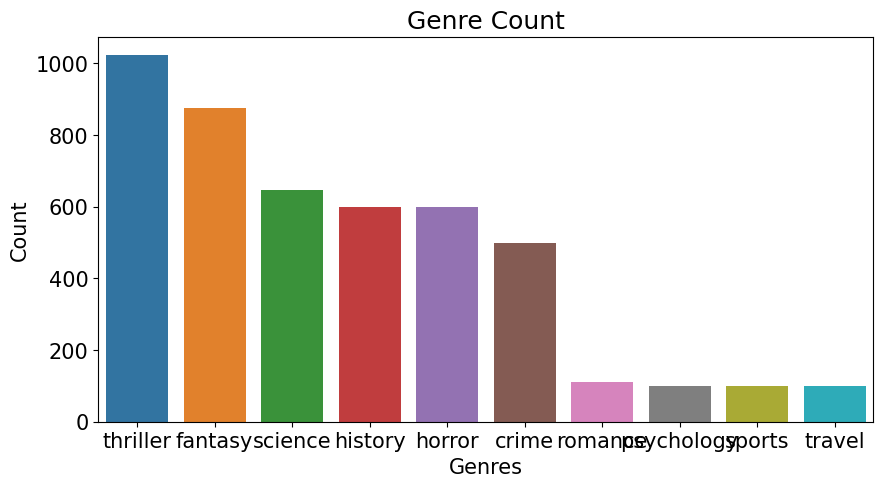

In [ ]:
#Generating a countplot for target label
plt.figure(figsize=(10,5))
sns.barplot(x=df['genre'].value_counts().index,y=df['genre'].value_counts())
plt.title('Genre Count')
plt.xlabel('Genres')
plt.ylabel('Count');

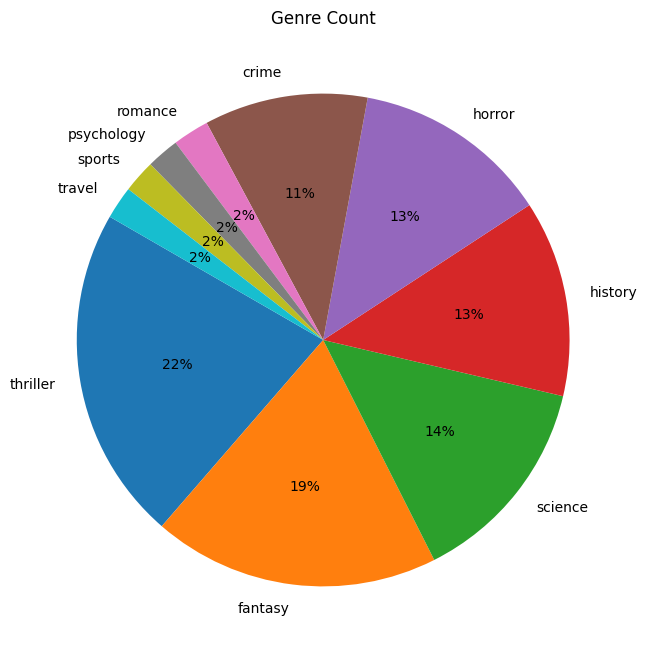

In [ ]:
#Generating a pie chart for target label
plt.figure(figsize=(10,8))
plt.pie(x=df['genre'].value_counts(),labels=df['genre'].value_counts().index,textprops={'fontsize':10},startangle=150,autopct='%1.0f%%')
plt.title('Genre Count');

In [ ]:
#Count for each genre
df['genre'].value_counts()


thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

In [ ]:
#Generating the column title_len
df['title_len']=df['title'].apply(lambda x:len(x.split()))
df.head()

title    genre  \
index                                       
0              Drowned Wednesday  fantasy   
1                  The Lost Hero  fantasy   
2      The Eyes of the Overworld  fantasy   
3                Magic's Promise  fantasy   
4                 Taran Wanderer  fantasy   

                                                 summary  title_len  
index                                                                
0       Drowned Wednesday is the first Trustee among ...          2  
1       As the book opens, Jason awakens on a school ...          3  
2       Cugel is easily persuaded by the merchant Fia...          5  
3       The book opens with Herald-Mage Vanyel return...          2  
4       Taran and Gurgi have returned to Caer Dallben...          2

In [ ]:
#The below function comes in handy to count the number of characters in a text
def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

#Generating the column title_char_len
df['title_char_len']=df['title'].apply(char_count)


In [ ]:
df.head()


title    genre  \
index                                       
0              Drowned Wednesday  fantasy   
1                  The Lost Hero  fantasy   
2      The Eyes of the Overworld  fantasy   
3                Magic's Promise  fantasy   
4                 Taran Wanderer  fantasy   

                                                 summary  title_len  \
index                                                                 
0       Drowned Wednesday is the first Trustee among ...          2   
1       As the book opens, Jason awakens on a school ...          3   
2       Cugel is easily persuaded by the merchant Fia...          5   
3       The book opens with Herald-Mage Vanyel return...          2   
4       Taran and Gurgi have returned to Caer Dallben...          2   

       title_char_len  
index                  
0                  16  
1                  11  
2                  21  
3                  14  
4                  13

<ipython-input-10-ef736d463ddd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['title_len'],hue=df['genre'],shade=True)
<ipython-input-10-ef736d463ddd>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['title_char_len'],hue=df['genre'],shade=True)


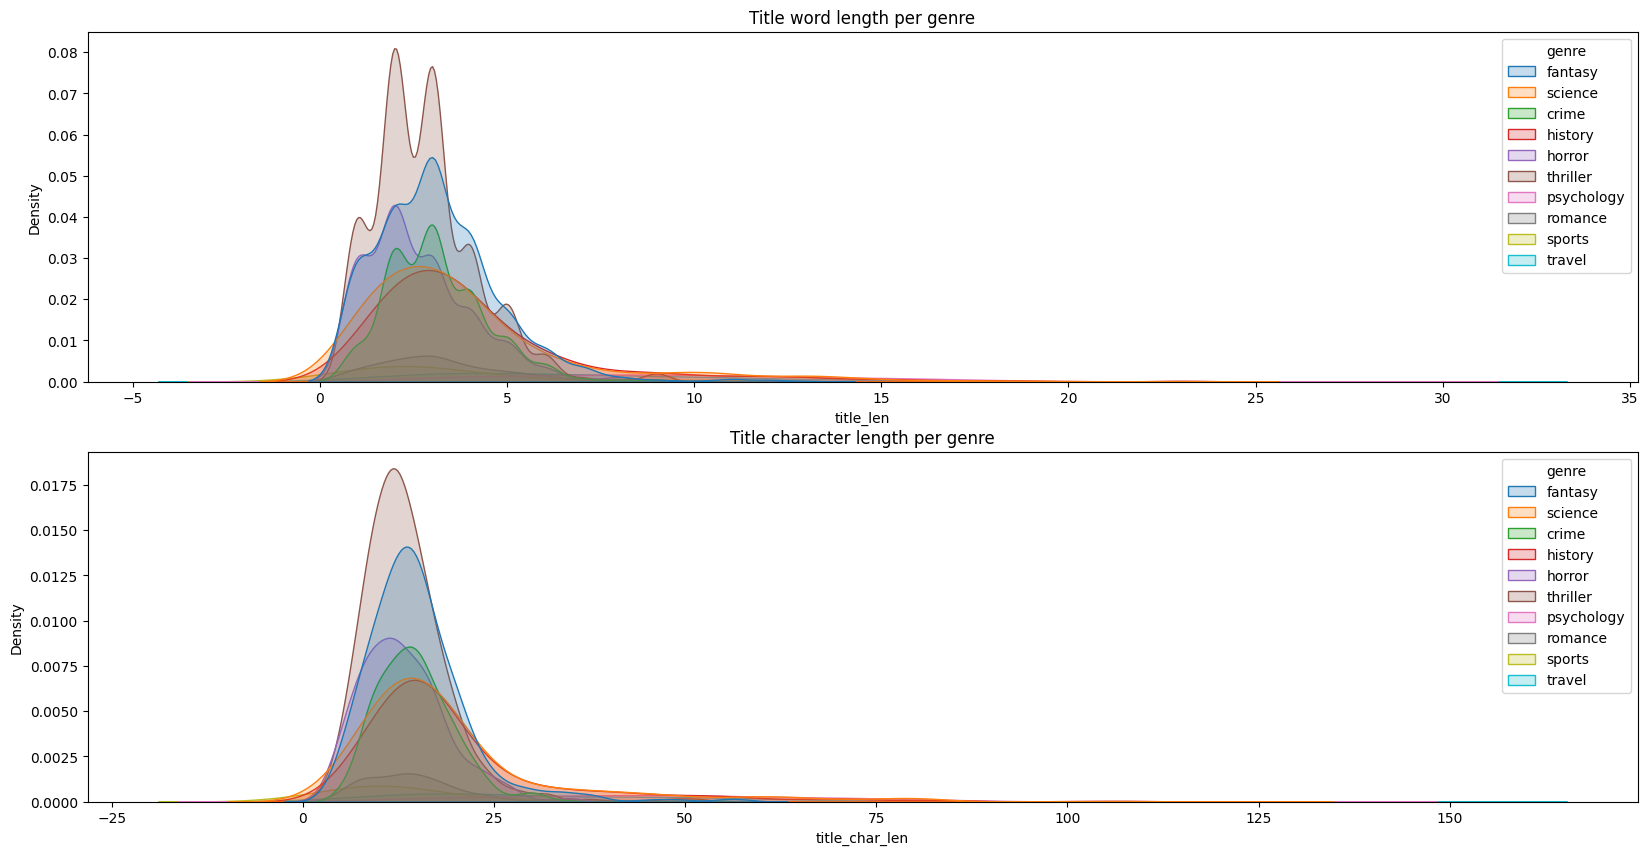

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.kdeplot(x=df['title_len'],hue=df['genre'],shade=True)
plt.title('Title word length per genre')

plt.subplot(2,1,2)
sns.kdeplot(x=df['title_char_len'],hue=df['genre'],shade=True)
plt.title('Title character length per genre')

plt.show()

In [ ]:
#Generating the column summary_len and summary_char_len
df['summary_len']=df['summary'].apply(lambda x:len(x.split()))
df['summary_char_len']=df['summary'].apply(char_count)

df.head()


title    genre  \
index                                       
0              Drowned Wednesday  fantasy   
1                  The Lost Hero  fantasy   
2      The Eyes of the Overworld  fantasy   
3                Magic's Promise  fantasy   
4                 Taran Wanderer  fantasy   

                                                 summary  title_len  \
index                                                                 
0       Drowned Wednesday is the first Trustee among ...          2   
1       As the book opens, Jason awakens on a school ...          3   
2       Cugel is easily persuaded by the merchant Fia...          5   
3       The book opens with Herald-Mage Vanyel return...          2   
4       Taran and Gurgi have returned to Caer Dallben...          2   

       title_char_len  summary_len  summary_char_len  
index                                                 
0                  16          803              3901  
1                  11          563              2564  
2                  21          334              1619  
3                  14          776              3822  
4                  13         1190              5553

<ipython-input-12-87d7d3308101>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['summary_len'],hue=df['genre'],shade=True)
<ipython-input-12-87d7d3308101>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['summary_char_len'],hue=df['genre'],shade=True)


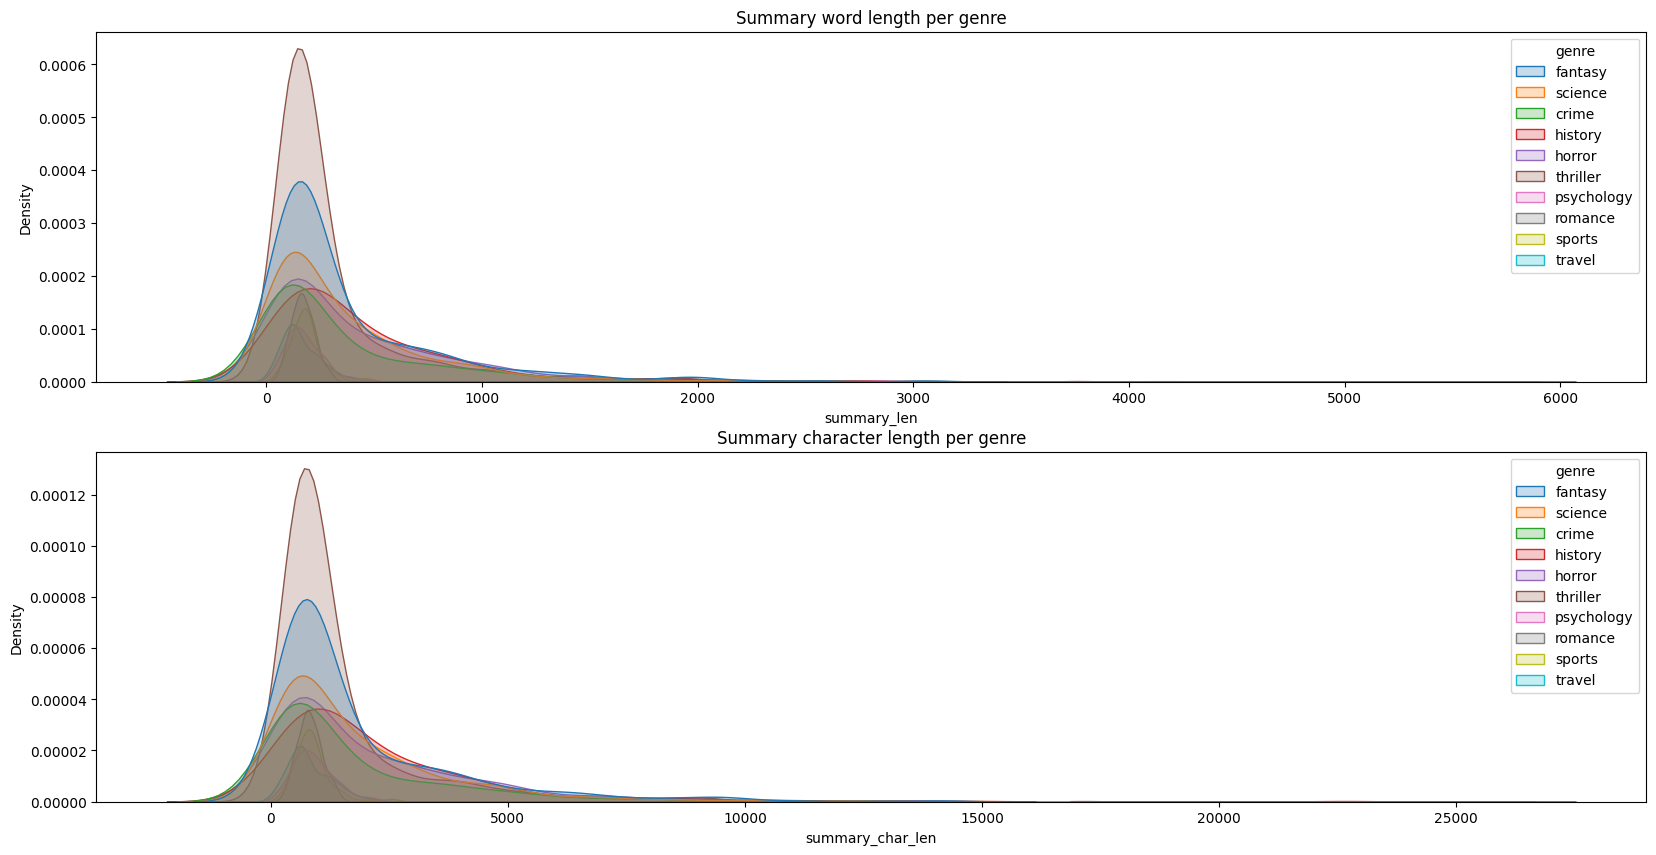

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.kdeplot(x=df['summary_len'],hue=df['genre'],shade=True)
plt.title('Summary word length per genre')

plt.subplot(2,1,2)
sns.kdeplot(x=df['summary_char_len'],hue=df['genre'],shade=True)
plt.title('Summary character length per genre')

plt.show()


In [ ]:
df.groupby('genre')[['title_len','title_char_len']].describe().T


genre                      crime     fantasy     history      horror  \
title_len      count  500.000000  876.000000  600.000000  600.000000   
               mean     3.122000    3.135845    4.146667    2.658333   
               std      1.327645    1.674288    3.134996    1.462359   
               min      1.000000    1.000000    1.000000    1.000000   
               25%      2.000000    2.000000    2.000000    2.000000   
               50%      3.000000    3.000000    3.000000    2.000000   
               75%      4.000000    4.000000    5.000000    3.000000   
               max      9.000000   13.000000   23.000000    9.000000   
title_char_len count  500.000000  876.000000  600.000000  600.000000   
               mean    14.762000   14.993151   20.191667   13.106667   
               std      5.329368    6.974563   14.725023    5.687343   
               min      5.000000    3.000000    4.000000    2.000000   
               25%     11.000000   11.000000   12.000000    9.000000   
               50%     14.000000   14.000000   16.000000   12.000000   
               75%     18.000000   18.000000   21.000000   16.000000   
               max     54.000000   58.000000  109.000000   36.000000   

genre                 psychology     romance     science      sports  \
title_len      count  100.000000  111.000000  647.000000  100.000000   
               mean     9.460000    3.108108    3.975270    3.770000   
               std      4.589008    1.497582    3.173908    3.794880   
               min      2.000000    1.000000    1.000000    1.000000   
               25%      6.000000    2.000000    2.000000    2.000000   
               50%      9.000000    3.000000    3.000000    3.000000   
               75%     12.000000    4.000000    5.000000    4.000000   
               max     26.000000    7.000000   23.000000   24.000000   
title_char_len count  100.000000  111.000000  647.000000  100.000000   
               mean    46.770000   13.954955   20.009274   16.390000   
               std     22.112593    5.748340   15.579415   17.529712   
               min     10.000000    5.000000    3.000000    2.000000   
               25%     31.250000    9.000000   12.000000    7.750000   
               50%     44.500000   14.000000   16.000000   11.000000   
               75%     61.000000   17.000000   21.000000   15.250000   
               max    122.000000   34.000000  122.000000  121.000000   

genre                    thriller      travel  
title_len      count  1023.000000  100.000000  
               mean      2.800587    7.000000  
               std       1.386728    4.456297  
               min       1.000000    1.000000  
               25%       2.000000    4.000000  
               50%       3.000000    6.500000  
               75%       3.000000   10.000000  
               max       9.000000   28.000000  
title_char_len count  1023.000000  100.000000  
               mean     13.473118   33.600000  
               std       5.893627   22.064186  
               min       2.000000    8.000000  
               25%      10.000000   17.000000  
               50%      13.000000   26.000000  
               75%      16.000000   46.500000  
               max      52.000000  139.000000

In [ ]:
#Combining the title and summary column for further text preprocessing
df['Combined_Text']=df['title'] + ' ' + df['summary']
df.head()


title    genre  \
index                                       
0              Drowned Wednesday  fantasy   
1                  The Lost Hero  fantasy   
2      The Eyes of the Overworld  fantasy   
3                Magic's Promise  fantasy   
4                 Taran Wanderer  fantasy   

                                                 summary  title_len  \
index                                                                 
0       Drowned Wednesday is the first Trustee among ...          2   
1       As the book opens, Jason awakens on a school ...          3   
2       Cugel is easily persuaded by the merchant Fia...          5   
3       The book opens with Herald-Mage Vanyel return...          2   
4       Taran and Gurgi have returned to Caer Dallben...          2   

       title_char_len  summary_len  summary_char_len  \
index                                                  
0                  16          803              3901   
1                  11          563              2564   
2                  21          334              1619   
3                  14          776              3822   
4                  13         1190              5553   

                                           Combined_Text  
index                                                     
0      Drowned Wednesday  Drowned Wednesday is the fi...  
1      The Lost Hero  As the book opens, Jason awaken...  
2      The Eyes of the Overworld  Cugel is easily per...  
3      Magic's Promise  The book opens with Herald-Ma...  
4      Taran Wanderer  Taran and Gurgi have returned ...

In [ ]:
# Function to convert the combined text to lowercase.
def lowercase(text):
    text=text.lower()
    return text

In [ ]:
# Function to remove the punctuations from the combined text.
punc=string.punctuation

def removepunc(text):
    return text.translate(str.maketrans('','',punc))


In [ ]:
#Even after the previous operations on text,it still contains a lot of words that do not add any context to language processing in NLP which are known as stopwords.
#Thus it is necessary to filter these stopwords out of the required text using the below function
def remove_sw(text):
    new_list=[]
    # Tokenization is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words.
    words=word_tokenize(text)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)

    return ' '.join(new_list)

In [ ]:
# Function to perform stemming on the combined text
def stem_text(text):
    new_list=[]
    stemmer=PorterStemmer()
    words=word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return ' '.join(new_list)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['Combined_Text'] = df['Combined_Text'].apply(lowercase)
df['Combined_Text'] = df['Combined_Text'].apply(removepunc)
df['Combined_Text'] = df['Combined_Text'].apply(remove_sw)
df['Combined_Text'] = df['Combined_Text'].apply(stem_text)


In [ ]:
df.head()


title    genre  \
index                                       
0              Drowned Wednesday  fantasy   
1                  The Lost Hero  fantasy   
2      The Eyes of the Overworld  fantasy   
3                Magic's Promise  fantasy   
4                 Taran Wanderer  fantasy   

                                                 summary  title_len  \
index                                                                 
0       Drowned Wednesday is the first Trustee among ...          2   
1       As the book opens, Jason awakens on a school ...          3   
2       Cugel is easily persuaded by the merchant Fia...          5   
3       The book opens with Herald-Mage Vanyel return...          2   
4       Taran and Gurgi have returned to Caer Dallben...          2   

       title_char_len  summary_len  summary_char_len  \
index                                                  
0                  16          803              3901   
1                  11          563              2564   
2                  21          334              1619   
3                  14          776              3822   
4                  13         1190              5553   

                                           Combined_Text  
index                                                     
0      drown wednesday drown wednesday first truste a...  
1      lost hero book open jason awaken school bu una...  
2      eye overworld cugel easili persuad merchant fi...  
3      magic promis book open heraldmag vanyel return...  
4      taran wander taran gurgi return caer dallben f...

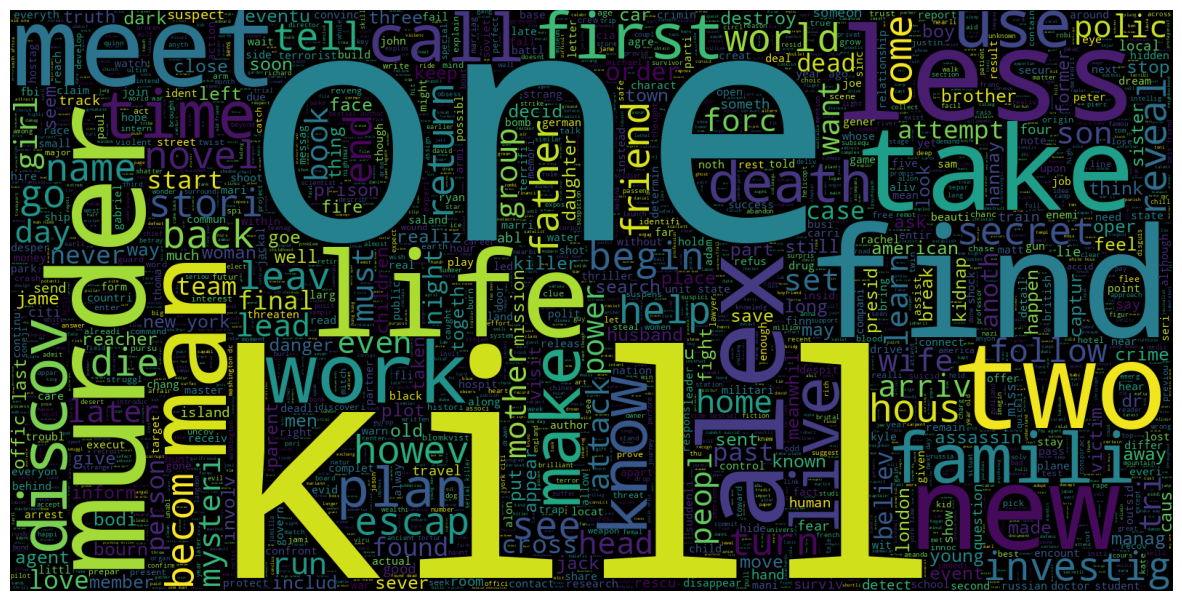

In [ ]:
text=' '.join(df[df['genre']=='thriller']['Combined_Text'])
plt.figure(figsize=(15,10))
wordcloud=WordCloud(max_words=5000,height=800,width=1600,background_color='black',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

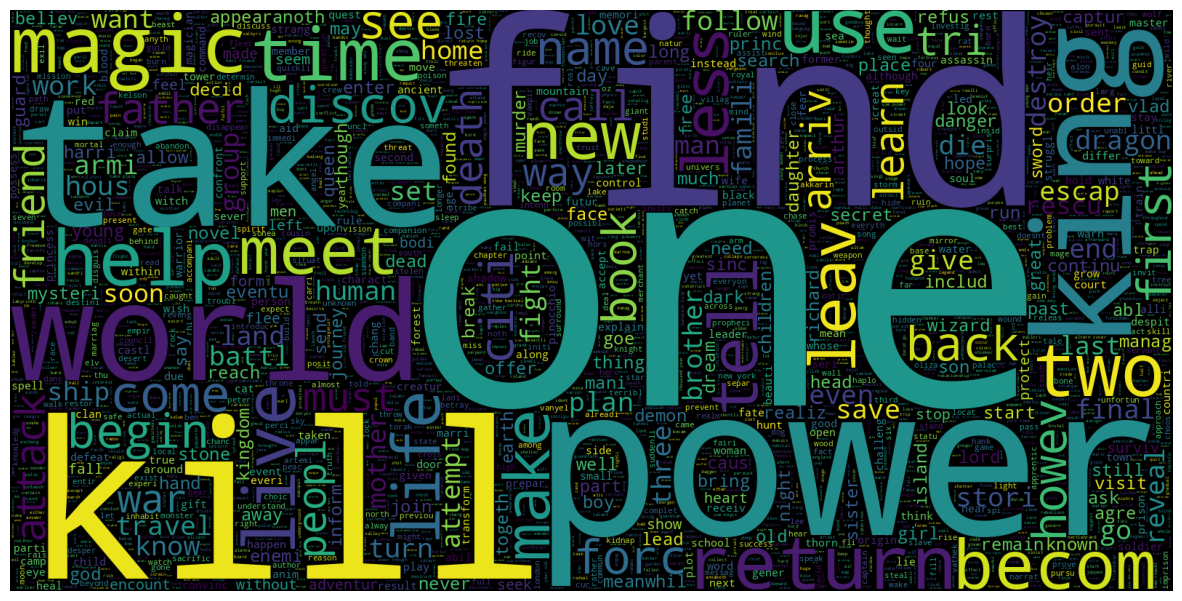

In [ ]:
text=' '.join(df[df['genre']=='fantasy']['Combined_Text'])
plt.figure(figsize=(15,10))
wordcloud=WordCloud(max_words=5000,height=800,width=1600,background_color='black',colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
#Importing LabelEncoder from scikit learn library
from sklearn.preprocessing import LabelEncoder

#Encoding the genre column
encoder=LabelEncoder()
df['genre']=encoder.fit_transform(df['genre'])

In [ ]:
df.head()


title  genre  \
index                                     
0              Drowned Wednesday      1   
1                  The Lost Hero      1   
2      The Eyes of the Overworld      1   
3                Magic's Promise      1   
4                 Taran Wanderer      1   

                                                 summary  title_len  \
index                                                                 
0       Drowned Wednesday is the first Trustee among ...          2   
1       As the book opens, Jason awakens on a school ...          3   
2       Cugel is easily persuaded by the merchant Fia...          5   
3       The book opens with Herald-Mage Vanyel return...          2   
4       Taran and Gurgi have returned to Caer Dallben...          2   

       title_char_len  summary_len  summary_char_len  \
index                                                  
0                  16          803              3901   
1                  11          563              2564   
2                  21          334              1619   
3                  14          776              3822   
4                  13         1190              5553   

                                           Combined_Text  
index                                                     
0      drown wednesday drown wednesday first truste a...  
1      lost hero book open jason awaken school bu una...  
2      eye overworld cugel easili persuad merchant fi...  
3      magic promis book open heraldmag vanyel return...  
4      taran wander taran gurgi return caer dallben f...

In [ ]:
# Splitting data into features(X) and targets(y)
X=df['Combined_Text']
y=df['genre'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets to use in models
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 42,stratify=y)

In [ ]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train).toarray()
X_test=tfidf.transform(X_test).toarray()

In [ ]:
!pip install scikit-plot


In [ ]:
# Importing necessary metric funtions from respective libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)
    accuracy=round(accuracy_score(y_test,y_pred),3)
    precision=round(precision_score(y_test,y_pred,average='weighted'),3)
    recall=round(recall_score(y_test,y_pred,average='weighted'),3)

    print('Accuracy of the model: ',accuracy)
    print('Precision Score of the model: ',precision)
    print('Recall Score of the model: ',recall)

    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model:  0.43
Precision Score of the model:  0.561
Recall Score of the model:  0.43


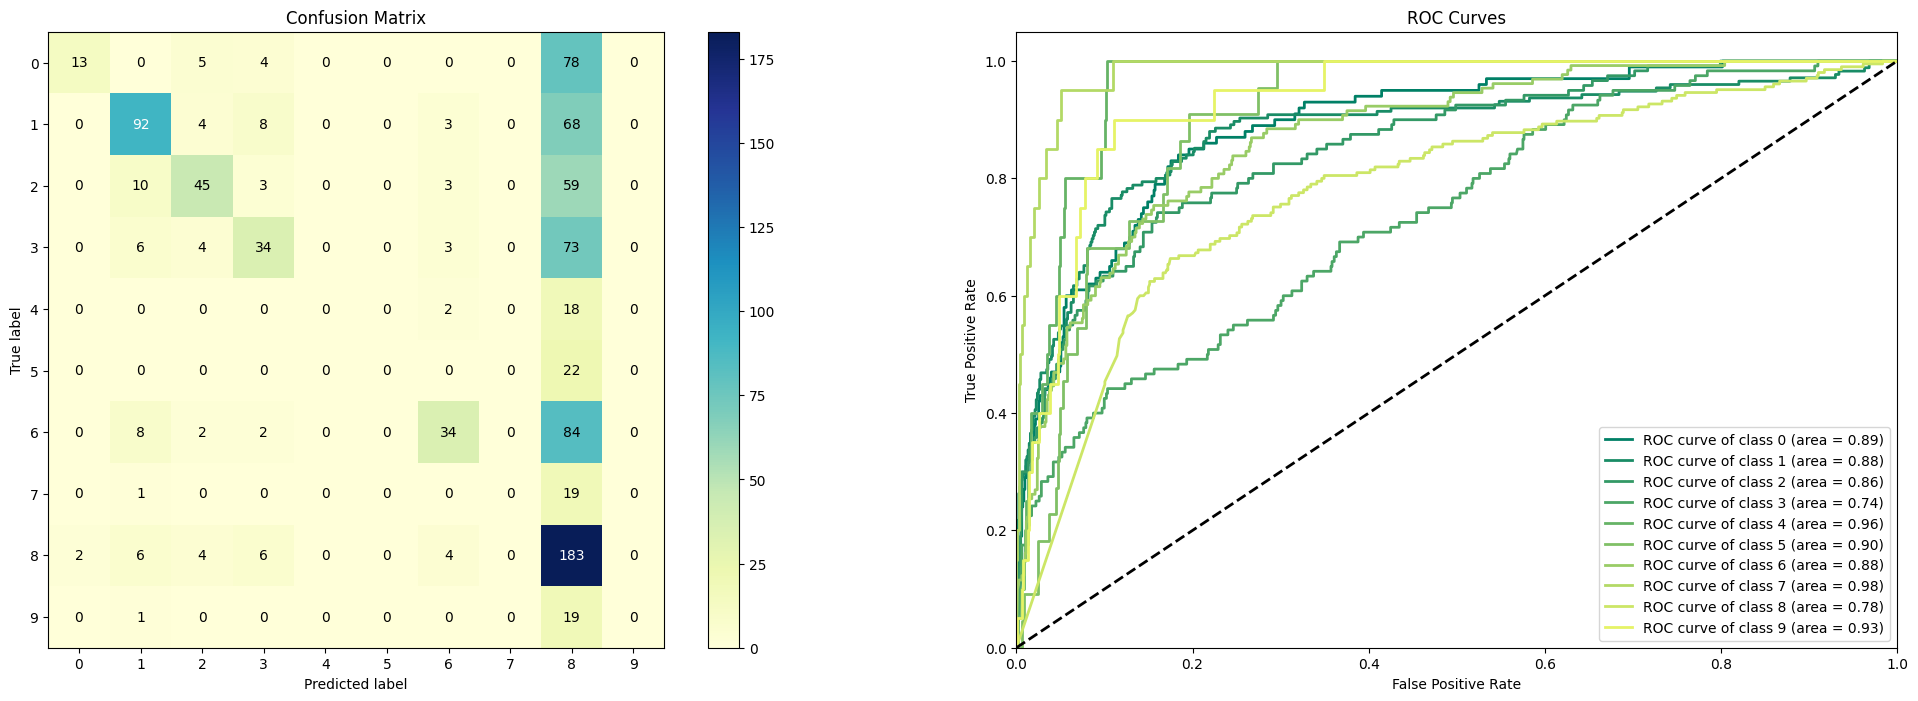

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
train_model(bnb)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model:  0.22
Precision Score of the model:  0.048
Recall Score of the model:  0.22


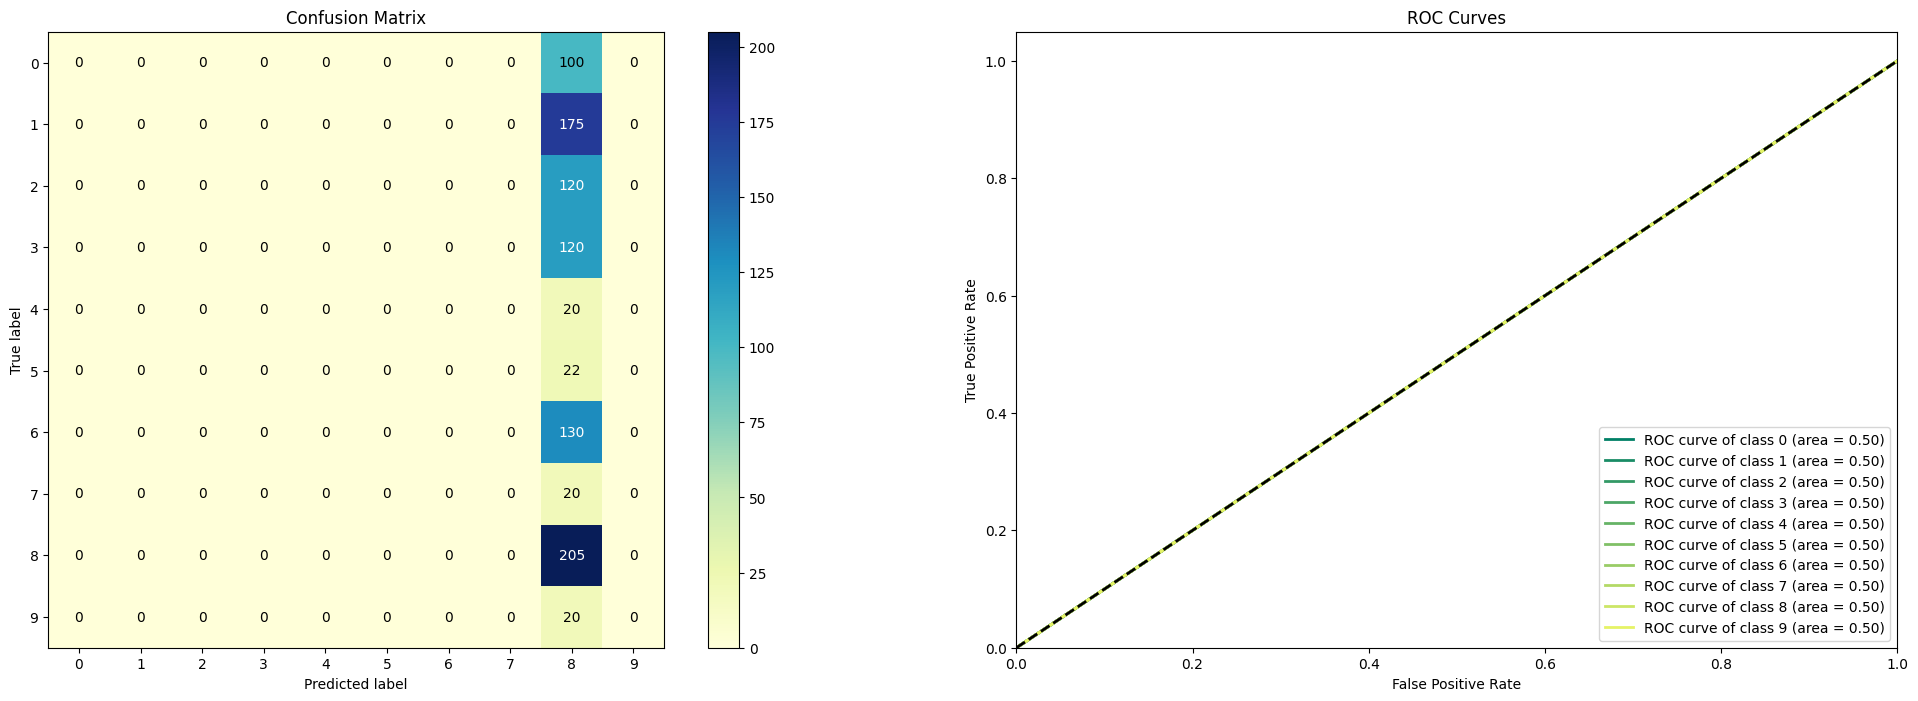

In [ ]:
from sklearn.naive_bayes import CategoricalNB
cnb=CategoricalNB()
train_model(cnb)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model:  0.666
Precision Score of the model:  0.668
Recall Score of the model:  0.666


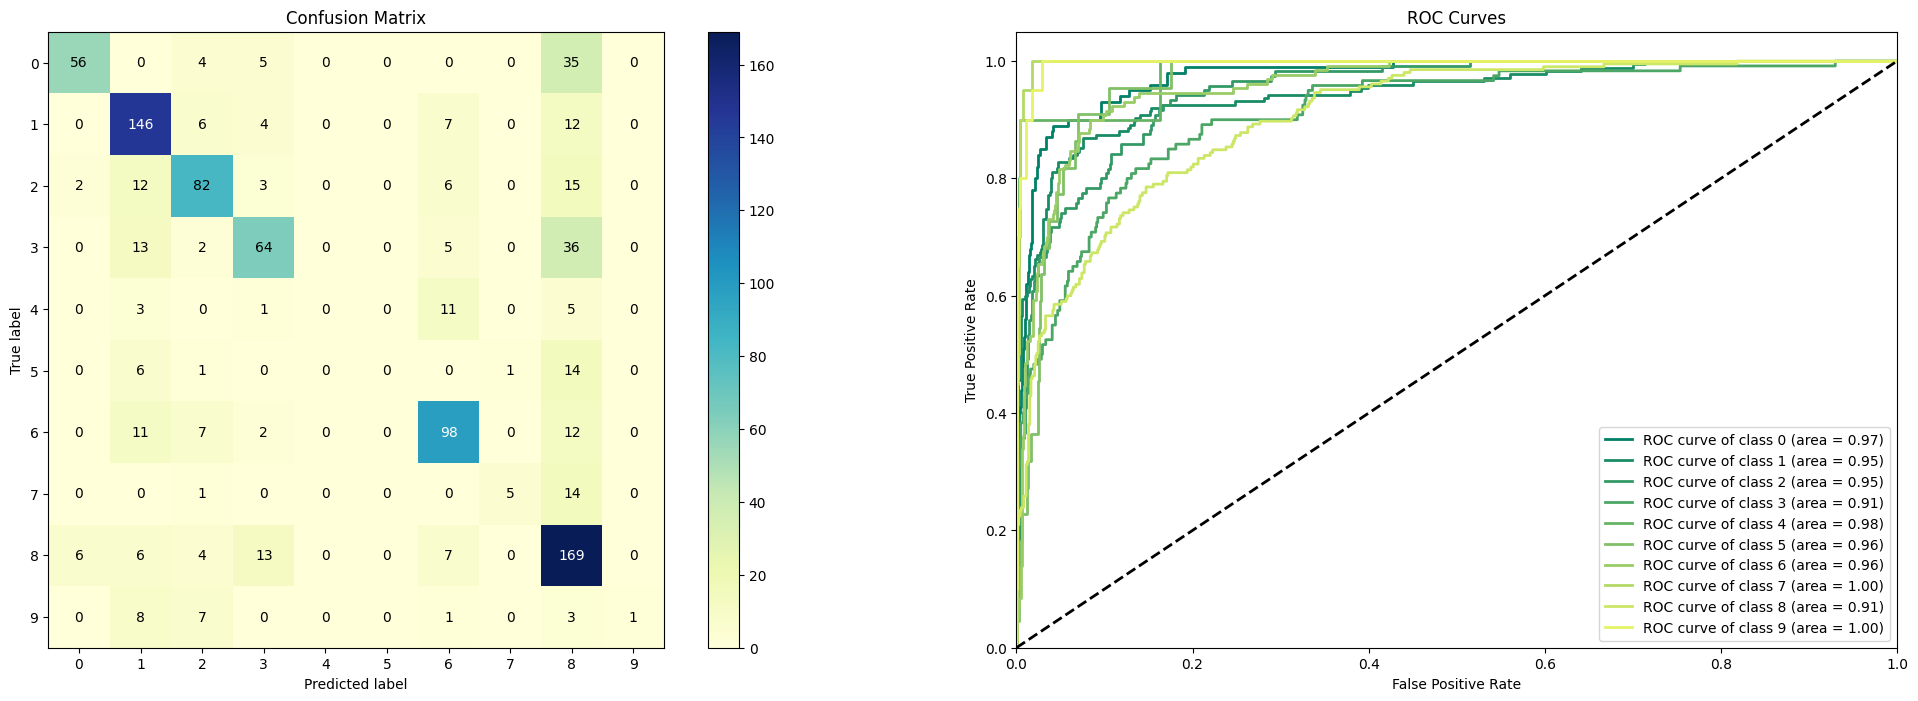

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
train_model(logreg)

Accuracy of the model:  0.607
Precision Score of the model:  0.624
Recall Score of the model:  0.607


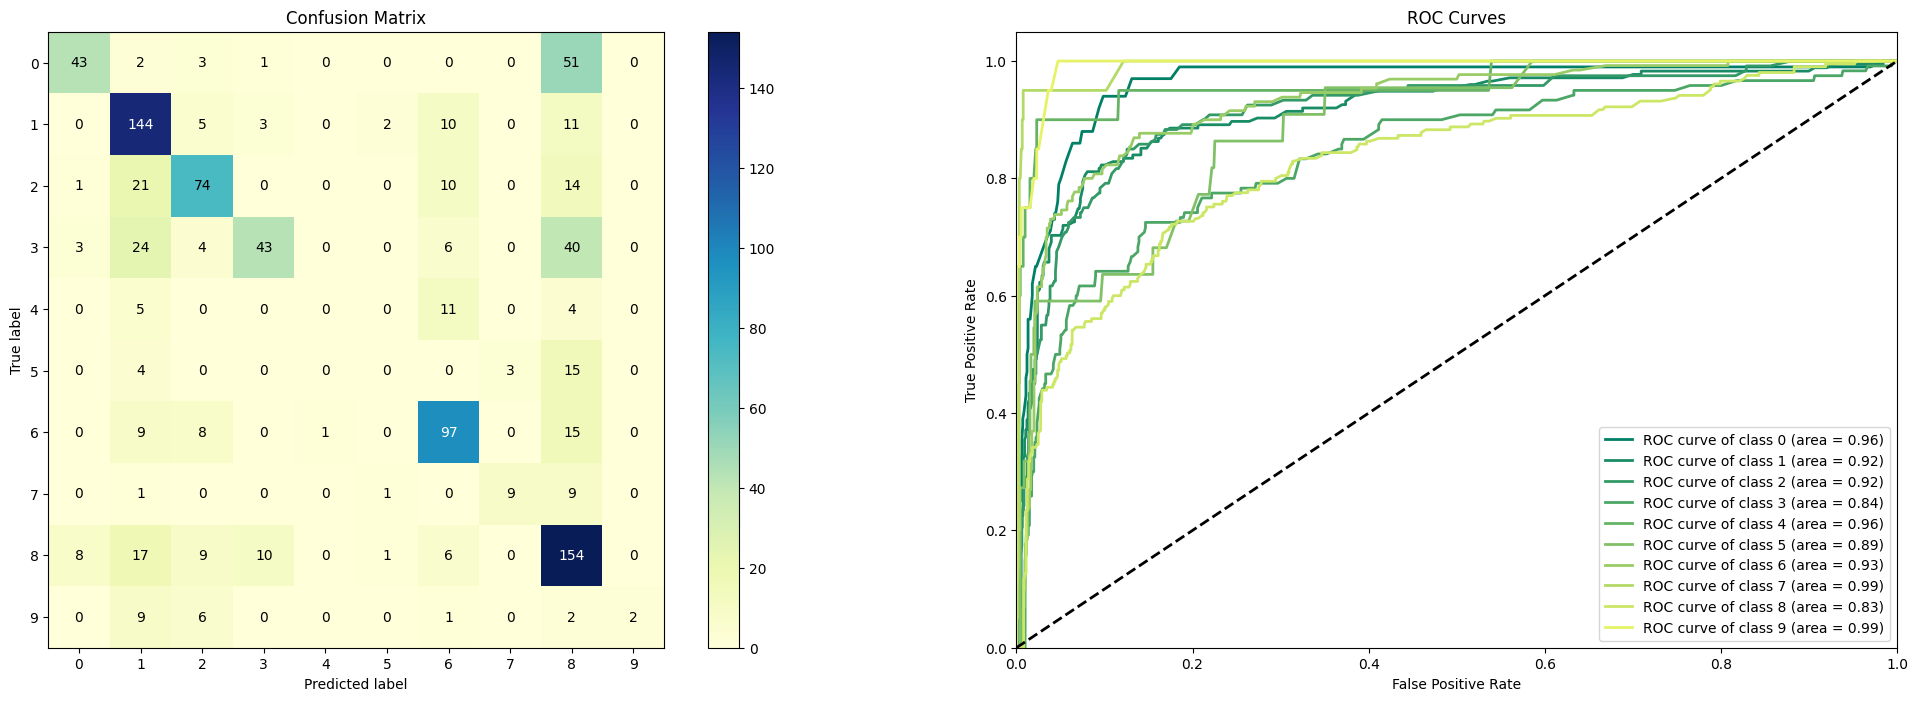

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=300)
train_model(rf)

Accuracy of the model:  0.609
Precision Score of the model:  0.635
Recall Score of the model:  0.609


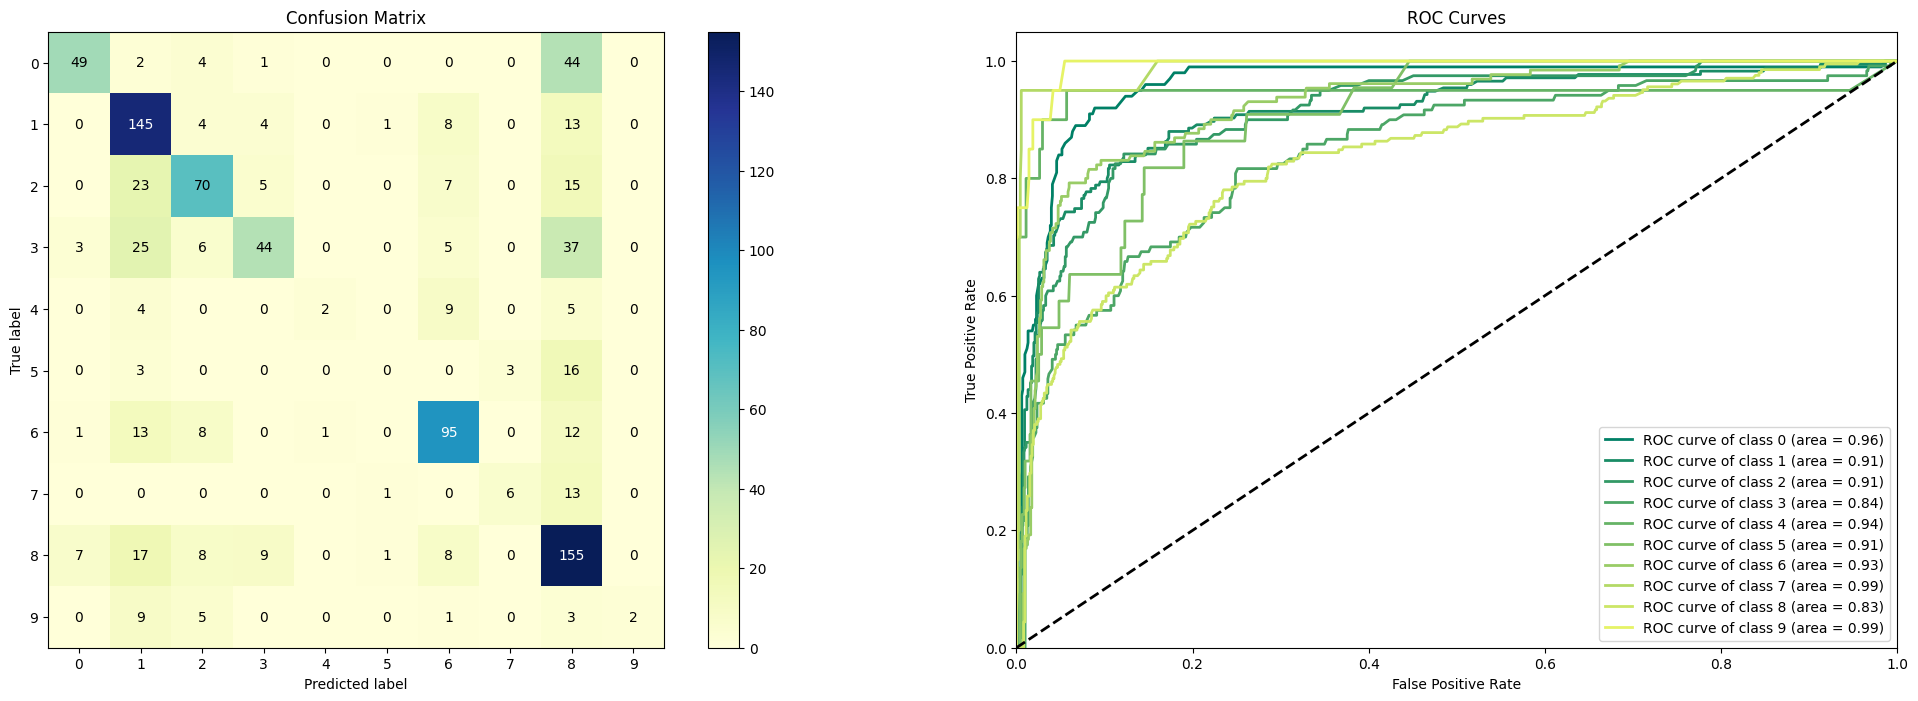

In [ ]:
rf=RandomForestClassifier(n_estimators=500)
train_model(rf)

In [ ]:
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno #For missing value visualization

import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import time
#For NLP

In [ ]:
#For NLP
import re
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
nltk.download('omw-1.4')
clear_output()

<Axes: >

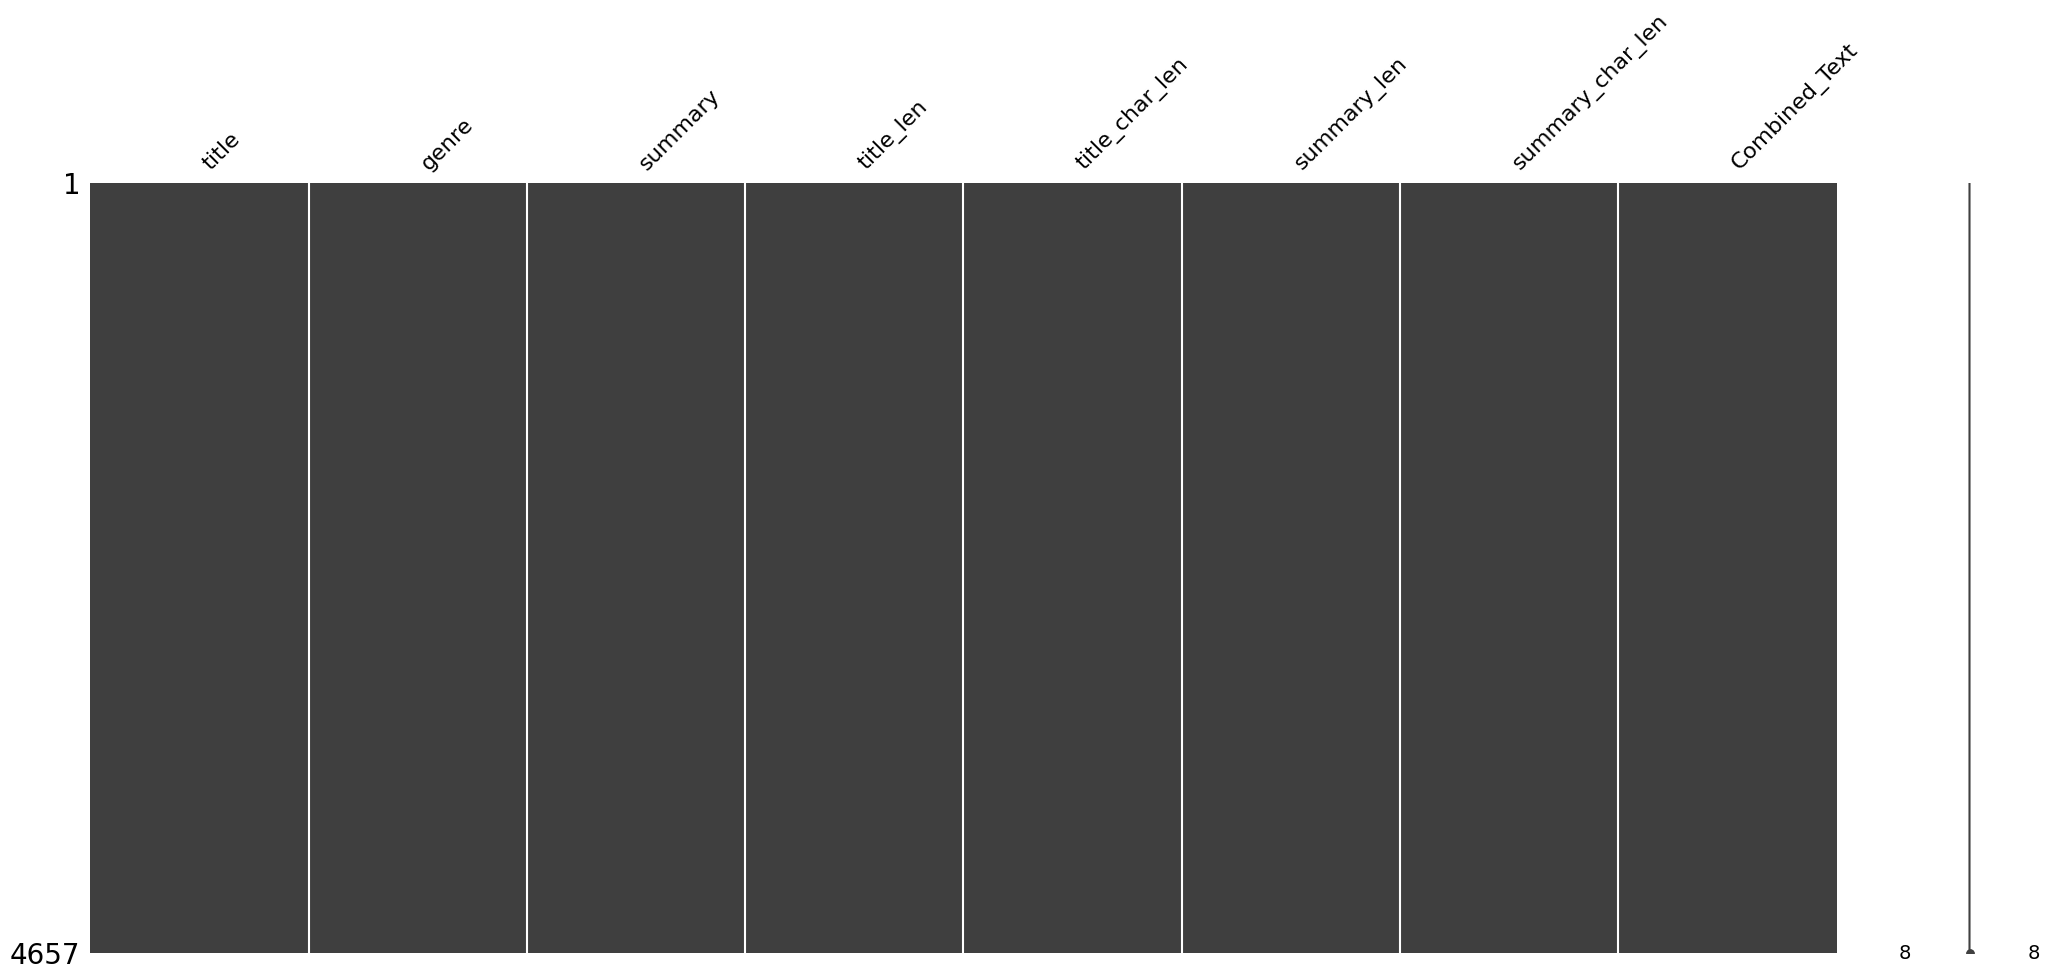

In [ ]:
msno.matrix(df)

In [ ]:
#cleaning unecessary text from the string
Stopwords = set(stopwords.words('english'))
def clean(text):
    text = text.lower() #Converting to lowerCase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text) #removing punctuation

    text_tokens = word_tokenize(text) #removing stopwords
    tw = [word for word in text_tokens if not word in Stopwords]
    text = (" ").join(tw)

    splt = text.split(' ')
    output = [x for x in splt if len(x) > 3] #removing words with length<=3
    text = (" ").join(output)

    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #removing single character
    text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    text = re.sub('\n', ' ',text) #removal of new line characters
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    return text

In [ ]:
df['summary'] = df['summary'].apply(clean)
df['title'] = df['title'].apply(clean)

In [ ]:
df['genre'].value_counts()


8    1023
1     876
6     647
2     600
3     600
0     500
5     111
4     100
7     100
9     100
Name: genre, dtype: int64

In [ ]:
genre_df = pd.DataFrame({'genre':['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel'],'count':[1023,876,647,600,600,500,111,
                                                                        100,100,100]})
fig = px.histogram(genre_df,x = 'genre',y = 'count',color = 'genre')
fig.show()

In [ ]:
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(summary)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
def make_string(genre):
    s = ""
    for row_index,row in df.iterrows():
        if(row['genre'] == genre):
            s+=(row['summary']+' ')
    return s



In [ ]:
for Genre in genre:
    summary = make_string(Genre)

    # Check if summary is not empty before generating word cloud
    if summary:
        print_wordCloud(Genre, summary)
    else:
        print(f"No data available for {Genre}. Skipping word cloud generation.")


No data available for thriller. Skipping word cloud generation.
No data available for fantasy. Skipping word cloud generation.
No data available for science. Skipping word cloud generation.
No data available for history. Skipping word cloud generation.
No data available for horror. Skipping word cloud generation.
No data available for crime. Skipping word cloud generation.
No data available for romance. Skipping word cloud generation.
No data available for psychology. Skipping word cloud generation.
No data available for sports. Skipping word cloud generation.
No data available for travel. Skipping word cloud generation.


In [ ]:
def data_preprocessing(text):
    tokens = word_tokenize(text) #Tokenization
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens] #Lemmetization
    tokens = [SnowballStemmer(language = 'english').stem(word) for word in tokens] #Stemming
    return " ".join(tokens)

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['summary'] = df['summary'].apply(data_preprocessing)
df['title'] = df['title'].apply(data_preprocessing)
df

title  genre  \
index                                 
0            drown wednesday      1   
1                  lost hero      1   
2              eye overworld      1   
3               magic promis      1   
4               taran wander      1   
...                      ...    ...   
4652                   hound      1   
4653   charli chocol factori      1   
4654                    rise      1   
4655                frostbit      1   
4656                 radianc      1   

                                                 summary  title_len  \
index                                                                 
0      drown wednesday first truste among morrow day ...          2   
1      book open jason awaken school unabl rememb any...          3   
2      cugel easili persuad merchant fianosth attempt...          5   
3      book open herald mage vanyel return countri va...          2   
4      taran gurgi return caer dallben follow event t...          2   
...                                                  ...        ...   
4652   atticus sullivan last druid life peac arizona ...          1   
4653   charli bucket wonder adventur begin find willi...          5   
4654   live dream child born free say like land fathe...          2   
4655   rose love dimitri dimitri might love tasha mas...          1   
4656   princ valu brishen khaskem princ live content ...          1   

       title_char_len  summary_len  summary_char_len  \
index                                                  
0                  16          803              3901   
1                  11          563              2564   
2                  21          334              1619   
3                  14          776              3822   
4                  13         1190              5553   
...               ...          ...               ...   
4652                7          144               746   
4653               29           41               209   
4654                9          244              1122   
4655                9          163               819   
4656                8          195               898   

                                           Combined_Text  
index                                                     
0      drown wednesday drown wednesday first truste a...  
1      lost hero book open jason awaken school bu una...  
2      eye overworld cugel easili persuad merchant fi...  
3      magic promis book open heraldmag vanyel return...  
4      taran wander taran gurgi return caer dallben f...  
...                                                  ...  
4652   hound atticu ’ sullivan last druid live peac a...  
4653   charli chocol factori charli bucket wonder adv...  
4654   red rise live dream children born free say lik...  
4655   frostbit rose love dimitri dimitri might love ...  
4656   radianc princ valu brishen khaskem princ kai l...  

[4657 rows x 8 columns]

In [ ]:
#Converting all the categorical features of 'genre' to numerical
df['genre'] = LabelEncoder().fit_transform(df['genre'])
df

title  genre  \
index                                 
0            drown wednesday      1   
1                  lost hero      1   
2              eye overworld      1   
3               magic promis      1   
4               taran wander      1   
...                      ...    ...   
4652                   hound      1   
4653   charli chocol factori      1   
4654                    rise      1   
4655                frostbit      1   
4656                 radianc      1   

                                                 summary  title_len  \
index                                                                 
0      drown wednesday first truste among morrow day ...          2   
1      book open jason awaken school unabl rememb any...          3   
2      cugel easili persuad merchant fianosth attempt...          5   
3      book open herald mage vanyel return countri va...          2   
4      taran gurgi return caer dallben follow event t...          2   
...                                                  ...        ...   
4652   atticus sullivan last druid life peac arizona ...          1   
4653   charli bucket wonder adventur begin find willi...          5   
4654   live dream child born free say like land fathe...          2   
4655   rose love dimitri dimitri might love tasha mas...          1   
4656   princ valu brishen khaskem princ live content ...          1   

       title_char_len  summary_len  summary_char_len  \
index                                                  
0                  16          803              3901   
1                  11          563              2564   
2                  21          334              1619   
3                  14          776              3822   
4                  13         1190              5553   
...               ...          ...               ...   
4652                7          144               746   
4653               29           41               209   
4654                9          244              1122   
4655                9          163               819   
4656                8          195               898   

                                           Combined_Text  
index                                                     
0      drown wednesday drown wednesday first truste a...  
1      lost hero book open jason awaken school bu una...  
2      eye overworld cugel easili persuad merchant fi...  
3      magic promis book open heraldmag vanyel return...  
4      taran wander taran gurgi return caer dallben f...  
...                                                  ...  
4652   hound atticu ’ sullivan last druid live peac a...  
4653   charli chocol factori charli bucket wonder adv...  
4654   red rise live dream children born free say lik...  
4655   frostbit rose love dimitri dimitri might love ...  
4656   radianc princ valu brishen khaskem princ kai l...  

[4657 rows x 8 columns]

In [ ]:
X = CountVectorizer().fit_transform(df['summary'])
y = df['genre']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
models = [BernoulliNB(),MultinomialNB(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),SVC(),DummyClassifier(),ExtraTreeClassifier(),KNeighborsClassifier()]

In [ ]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

BernoulliNB Successfully Trained
MultinomialNB Successfully Trained
SGDClassifier Successfully Trained
LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
GradientBoostingClassifier Successfully Trained
AdaBoostClassifier Successfully Trained
SVC Successfully Trained
DummyClassifier Successfully Trained
ExtraTreeClassifier Successfully Trained
KNeighborsClassifier Successfully Trained
